In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD DATASET

In [9]:
# Load the dataset
df = pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [10]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

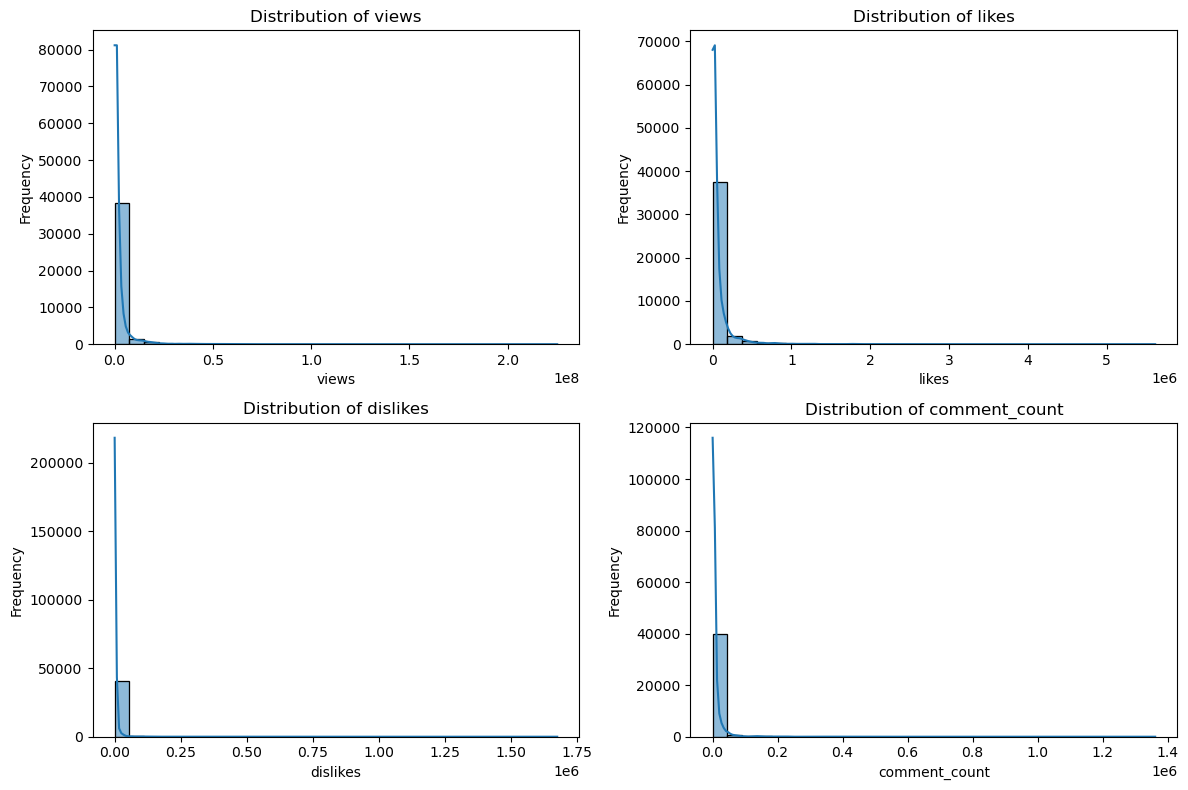

In [11]:
# Plot histograms for numerical columns to understand their distributions
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### HEATMAP

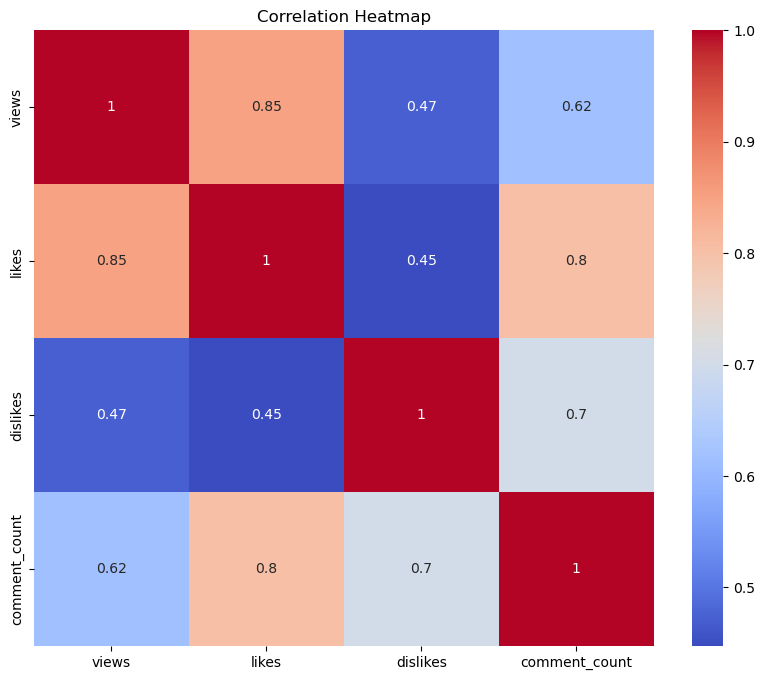

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### SCATTER PLOT
#### Shows VIEWS vs LIKES

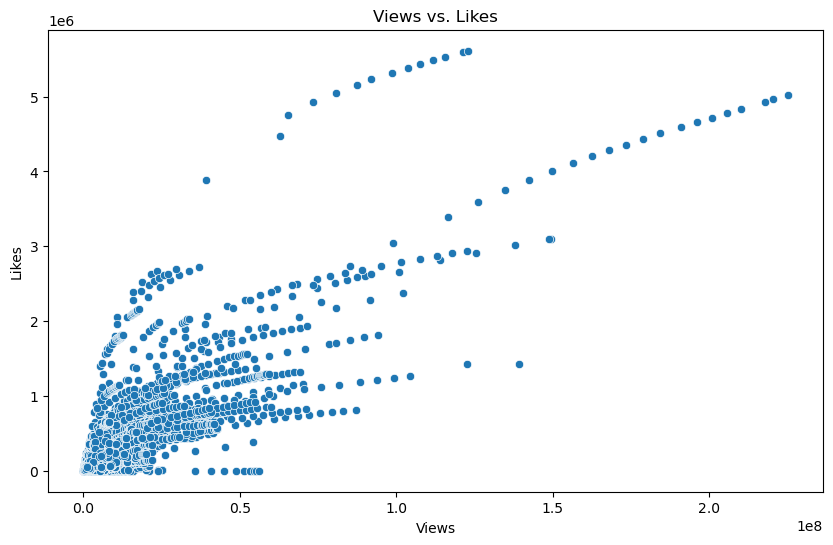

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Views vs. Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

### BARPLOT
### Shows average likes and dislikes by categoryID

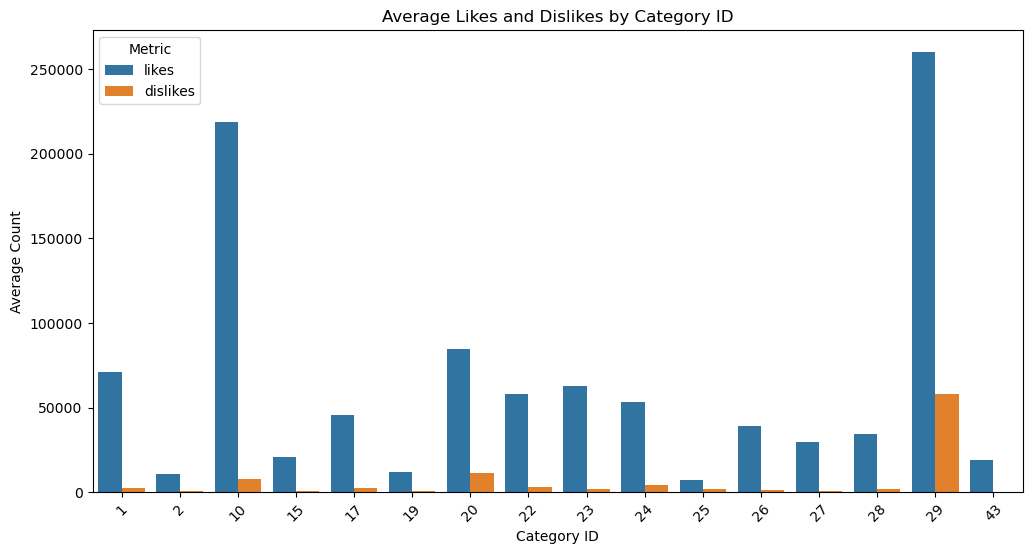

In [14]:
category_stats = df.groupby('category_id')[['likes', 'dislikes']].mean().reset_index()
category_stats_melted = pd.melt(category_stats, id_vars=['category_id'], value_vars=['likes', 'dislikes'], var_name='metric', value_name='average')

plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='average', hue='metric', data=category_stats_melted)
plt.title('Average Likes and Dislikes by Category ID')
plt.xlabel('Category ID')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()